<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Онлайн обучение и VowpalWabbit</center></h2>

<img src=https://cdn.dribbble.com/users/261617/screenshots/3146111/vw-dribbble_1x.png>

[Vowpal Wabbit](https://github.com/JohnLangford/vowpal_wabbit) - это библиотека с большим набором оптимизированных итеративных алгоритмов машинного обучения

В этом туториале мы применим эту библиотеку с целью решить задачу классификации с помощью логистической регрессии.

**Туториалы:**
https://github.com/JohnLangford/vowpal_wabbit/wiki/Tutorial

**Туториал для сборки в unix:**
https://github.com/JohnLangford/vowpal_wabbit/wiki/v7.0_tutorial.pdf

**Установка**
https://github.com/JohnLangford/vowpal_wabbit/wiki/Download

# Загрузка и подготовка данных

https://www.kaggle.com/dalpozz/creditcardfraud/data

In [2]:
import shutil
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)


In [3]:
fn = './data/creditcard.csv.zip'
fn_out_train = './data/creditcard_vw_format_train'
fn_out_test = './data/creditcard_vw_format_test'
fn_out_validation = './data/creditcard_vw_format_validation'

fn_out_train_weight = './data/creditcard_vw_format_train_weight'
fn_out_test_weight = './data/creditcard_vw_format_test_weight'
fn_out_validation_weight = './data/creditcard_vw_format_validation_weight'

In [4]:
df = pd.read_csv(fn, compression='zip', header=0, sep=',', quotechar='"')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df['Class'] = df['Class']* 2 - 1

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,-1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,-1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-1


In [8]:
df['Class'].value_counts()

-1    284315
 1       492
Name: Class, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,-0.996545
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.083054
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-1.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,-1.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,-1.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,-1.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Time** - the seconds elapsed between each transaction and the first transaction in the dataset. Numeric  
**V1** - First principle component Numeric  
**V2** - Second principle component Numeric  
**V3** - Third principle component Numeric  
...  
**V28** - Twenty-eighth principle component Numeric  
**Amount** - Transaction Amount Numeric   
**Class** - The actual classification classes Numeric  

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

# Формат данных

[Описание формата](https://github.com/JohnLangford/vowpal_wabbit/wiki/Input-format)


Например:

1 1.0 zebra|MetricFeatures:3.28 height:1.5 length:2.0 |Says black with white stripes |OtherFeatures NumberOfLegs:4.0 HasStripes

Приведем данные к этому формату

In [14]:
skip_columns = {'Class', 'Index', 'Time'}

def df_to_file(file_name, data):
    with open(file_name, 'w') as f:
        for row in tqdm_notebook(data.itertuples()):
            features = row._asdict()
            features_formatted = ' '.join('{}:{}'.format(k, v) for k, v in features.items() if k not in skip_columns)
            f.write('{} | {}\n'.format(row.Class, features_formatted))

In [15]:
train, test = train_test_split(df, test_size=0.2)
train, validation = train_test_split(train, test_size=0.2)

In [16]:
df_to_file(fn_out_train, train)
df_to_file(fn_out_validation, validation)

In [17]:
%%sh -s "$fn_out_train" "$fn_out_validation" "$fn_out_test"

wc -l $1
head $1
wc -l $2

182276 ./data/creditcard_vw_format_train
-1 | V1:-0.46437120399950804 V2:1.52192001850498 V3:-0.599020536536089 V4:0.981530901404785 V5:0.793713405993499 V6:-0.21866228287178502 V7:0.698947265548961 V8:0.48942879849019394 V9:-0.979977920099288 V10:-0.580326388785876 V11:0.993780231154375 V12:0.43314254370932304 V13:-0.401504503965624 V14:-0.316049844680435 V15:-0.34897321623084904 V16:-0.0290462058051958 V17:0.8759019633954529 V18:0.7368077087959839 V19:0.7460483524714699 V20:0.079412671526558 V21:-0.0959438039858343 V22:-0.29881653882818604 V23:-0.0147227598657024 V24:0.55274714677681 V25:0.0868010992584598 V26:-0.6442950910306601 V27:0.198226061355053 V28:0.0562464098113088 Amount:29.85
-1 | V1:1.3528619913419802 V2:-0.541155860037134 V3:0.652703013886707 V4:-0.355968863796718 V5:-1.0430213235460302 V6:-0.47056521270144297 V7:-0.795911759157862 V8:-0.0614342967480467 V9:0.693959919298486 V10:0.31108444598477003 V11:1.9264938671258798 V12:-2.54389402266487 V13:0.860149139112062 V14:1.

# Команды

[Описание аргументов](https://github.com/JohnLangford/vowpal_wabbit/wiki/Command-line-arguments)

## Обучение

В vw реализован модифицированный градиентный спуск: http://www.cs.cmu.edu/~sross1/publications/uai13_normalized.pdf

In [18]:
%%sh -s "$fn_out_train" "$fn_out_validation" "$fn_out_test"

vw -d $1 -f ./simple_model.vw \
--sgd --adaptive --normalized --invariant \
--loss_function=logistic -l 0.5  --decay_learning_rate 0.95 \
--passes 4 --holdout_off --cache_file ./data.cache

rm ./data.cache

final_regressor = ./simple_model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 0.95
creating cache_file = ./data.cache
Reading datafile = ./data/creditcard_vw_format_train
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       30
1.147006 1.600864            2            2.0  -1.0000   1.3756       30
0.806092 0.465179            4            4.0  -1.0000  -0.2284       30
0.694745 0.583398            8            8.0  -1.0000  -0.0675       30
0.651088 0.607432           16           16.0  -1.0000  -0.3063       30
0.513206 0.375323           32           32.0  -1.0000  -1.0816       30
0.385826 0.258447           64           64.0  -1.0000  -1.2134       30
0.273281 0.160737          128          128.0  -1.0000  -2.1446       30
0.175994 0.078706          256    

## Предсказание

In [19]:
%%sh -s "$fn_out_train" "$fn_out_validation" "$fn_out_test"

vw -i ./simple_model.vw -t -d $2 -p ./simple_model_predictions.vw \
--invert_hash ./simple_model.vw.read

only testing
predictions = ./simple_model_predictions.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ./data/creditcard_vw_format_validation
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
92.380470 92.380470            1            1.0  -1.0000 -10.6115       30
79.635719 66.890968            2            2.0  -1.0000  -9.1787       30
73.576347 67.516975            4            4.0  -1.0000  -9.0456       30
73.246724 72.917101            8            8.0  -1.0000  -9.6724       30
66.646777 60.046830           16           16.0  -1.0000  -8.1120       30
62.608521 58.570265           32           32.0  -1.0000  -8.4377       30
62.810739 63.012957           64           64.0  -1.0000  -8.1466       30
62.226731 61.642724          128          128.0  -1.0000  -8.7198       30
62.264041 62.301351          256       

In [20]:
!cat ./simple_model.vw.read

Version 8.1.1
Min label:-50.000000
Max label:50.000000
bits:18
lda:0
0 ngram: 
0 skip: 
options:
Checksum: -578274599
:0
Amount:48761:-0.000017
Constant:116060:-8.855013
V1:142282:0.002728
V10:95918:-0.169084
V11:133386:0.412344
V12:151819:-0.270243
V13:39141:-0.404427
V14:78068:-0.443217
V15:249132:-0.115978
V16:253701:-0.207119
V17:52164:-0.056199
V18:228631:0.054567
V19:175012:-0.078193
V2:40106:-0.002816
V20:68712:-0.015740
V21:150712:0.043542
V22:180395:0.149973
V23:191497:-0.029073
V24:19755:-0.321929
V25:130312:-0.090700
V26:72606:-0.019753
V27:115973:-0.182959
V28:260221:-0.025208
V3:35450:-0.039859
V4:189175:0.402957
V5:94135:0.059047
V6:24536:-0.040503
V7:33330:0.009001
V8:36993:-0.063668
V9:148873:-0.232742


In [21]:
!head simple_model_predictions.vw

-10.611476
-9.178690
-9.384615
-9.045631
-9.829701
-9.259619
-9.382895
-9.672400
-8.720467
-9.289483


## Оценка качества

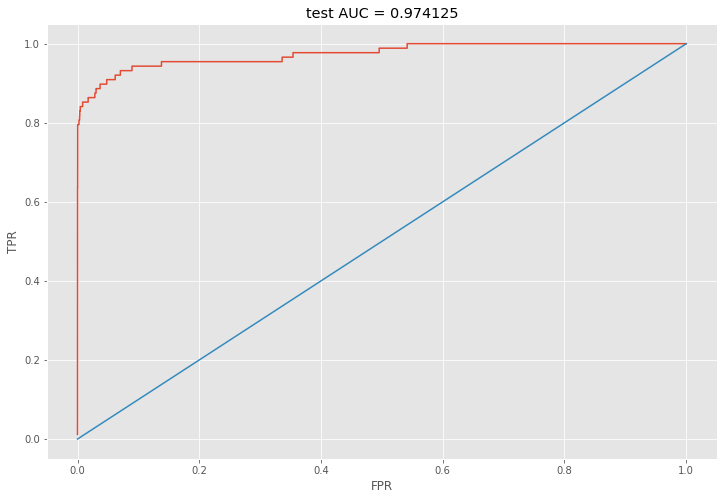

In [22]:
with open('simple_model_predictions.vw') as pred_file:
    validation_prediction = [float(label) for label in pred_file.readlines()]

auc = roc_auc_score(validation['Class'], validation_prediction)
curve = roc_curve(validation['Class'], validation_prediction)

plt.plot(curve[0], curve[1]);
plt.plot([0,1], [0,1])
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);

## Взвешивание объектов

Добавим вес меньшему классу

In [24]:
from sklearn.utils import compute_class_weight

In [25]:
compute_class_weight('balanced', [-1, 1], train.Class.values)

class_weights = dict(zip([-1., 1.], compute_class_weight('balanced', [-1, 1], train.Class.values)))

In [26]:
class_weights

{-1.0: 0.5008683227082875, 1.0: 288.4113924050633}

C помощью фунции `compute_class_weight` посчитайте веса классов и напишите функцию `df_to_file_weight`

In [27]:
skip_columns = {'Class', 'Index', 'Time'}

def df_to_file_weight(file_name, data):
    with open(file_name, 'w') as f:
        for row in tqdm_notebook(data.itertuples()):
            features = row._asdict()
            features_formatted = ' '.join('{}:{}'.format(k, v) for k, v in features.items() if k not in skip_columns)
            weight = class_weights.get(features['Class'])
            f.write('{} {} | {}\n'.format(row.Class, weight, features_formatted))

In [28]:
df_to_file_weight(fn_out_train_weight, train)
df_to_file_weight(fn_out_validation_weight, validation)

In [29]:
%%sh -s "$fn_out_train_weight" "$fn_out_train_weight"

wc -l $1
head $1
wc -l $2

182276 ./data/creditcard_vw_format_train_weight
-1 0.5008683227082875 | V1:-0.46437120399950804 V2:1.52192001850498 V3:-0.599020536536089 V4:0.981530901404785 V5:0.793713405993499 V6:-0.21866228287178502 V7:0.698947265548961 V8:0.48942879849019394 V9:-0.979977920099288 V10:-0.580326388785876 V11:0.993780231154375 V12:0.43314254370932304 V13:-0.401504503965624 V14:-0.316049844680435 V15:-0.34897321623084904 V16:-0.0290462058051958 V17:0.8759019633954529 V18:0.7368077087959839 V19:0.7460483524714699 V20:0.079412671526558 V21:-0.0959438039858343 V22:-0.29881653882818604 V23:-0.0147227598657024 V24:0.55274714677681 V25:0.0868010992584598 V26:-0.6442950910306601 V27:0.198226061355053 V28:0.0562464098113088 Amount:29.85
-1 0.5008683227082875 | V1:1.3528619913419802 V2:-0.541155860037134 V3:0.652703013886707 V4:-0.355968863796718 V5:-1.0430213235460302 V6:-0.47056521270144297 V7:-0.795911759157862 V8:-0.0614342967480467 V9:0.693959919298486 V10:0.31108444598477003 V11:1.9264938671258798 V12:-

In [30]:
%%sh -s "$fn_out_train_weight" "$fn_out_validation_weight" "$fn_out_test_weight"

vw -d $1 -f ./model_weights.vw \
--sgd --adaptive --normalized --invariant \
--loss_function=logistic -l 0.9 --decay_learning_rate 0.95 \
--passes 4 --holdout_off --cache_file ./data.cache

rm ./data.cache

final_regressor = ./model_weights.vw
Num weight bits = 18
learning rate = 0.9
initial_t = 0
power_t = 0.5
decay_learning_rate = 0.95
creating cache_file = ./data.cache
Reading datafile = ./data/creditcard_vw_format_train_weight
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.228345 1.228345            2            1.0  -1.0000   1.5755       30
0.837693 0.447041            4            2.0  -1.0000  -0.2270       30
0.701691 0.565690            8            4.0  -1.0000  -0.0989       30
0.646921 0.592152           16            8.0  -1.0000  -0.3729       30
0.490168 0.333414           32           16.0  -1.0000  -1.3056       30
0.353063 0.215958           64           32.1  -1.0000  -1.4332       30
0.933242 0.996303           78          327.0   1.0000  -0.5657       30
0.525196 0.117259          731          654.0  -1.0000  -2.5242       30
0.800999 1.076629         

In [31]:
%%sh -s "$fn_out_train_weight" "$fn_out_validation_weight" "$fn_out_test_weight"

vw -i model_weights.vw  -t -d $2 -p model_weights_predictions.vw --link=logistic \
--invert_hash ./model_weights.vw.read

only testing
predictions = model_weights_predictions.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ./data/creditcard_vw_format_validation_weight
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
44.284303 44.284303            2            1.0  -1.0000   0.0013       30
31.746023 19.207743            4            2.0  -1.0000   0.0019       30
25.418543 19.091063            8            4.0  -1.0000   0.0100       30
17.976739 10.534936           16            8.0  -1.0000   0.0153       30
15.090613 12.204487           32           16.0  -1.0000   0.0313       30
311.598921 327.850882           41          308.4   1.0000   1.0000       30
359.608921 398.064666          235          693.5   1.0000   1.0000       30
221.949997 84.308686         1045         1387.1  -1.0000   0.0167       30
187.949552 157.600239       

In [32]:
!cat model_weights.vw.read

Version 8.1.1
Min label:-50.000000
Max label:50.000000
bits:18
lda:0
0 ngram: 
0 skip: 
options: --link=logistic 
Checksum: -248441464
:0
Amount:48761:0.000305
Constant:116060:-4.271125
V1:142282:-0.036481
V10:95918:-0.418283
V11:133386:0.473056
V12:151819:-0.696925
V13:39141:-0.466729
V14:78068:-0.658312
V15:249132:-0.080759
V16:253701:-0.326012
V17:52164:-0.117374
V18:228631:-0.275936
V19:175012:-0.045846
V2:40106:-0.003743
V20:68712:-0.018345
V21:150712:0.125954
V22:180395:0.269293
V23:191497:-0.261742
V24:19755:-0.157297
V25:130312:0.443818
V26:72606:-1.750470
V27:115973:0.321568
V28:260221:0.101465
V3:35450:-0.034617
V4:189175:0.790397
V5:94135:0.045957
V6:24536:-0.215348
V7:33330:0.123307
V8:36993:-0.390730
V9:148873:-0.254674


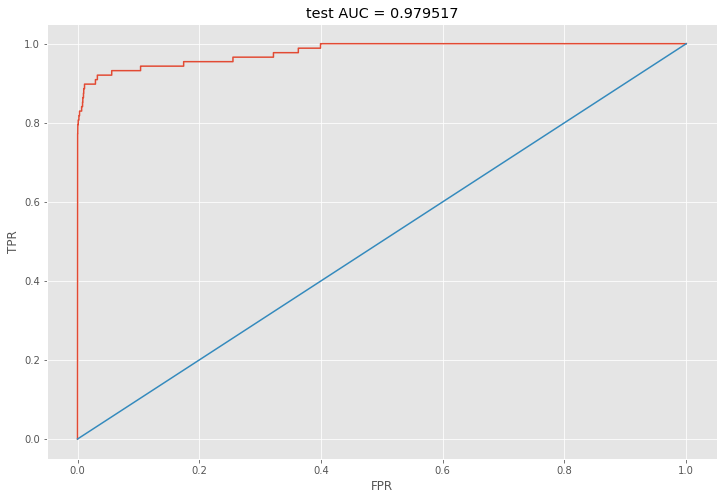

In [33]:
with open('model_weights_predictions.vw') as pred_file:
    validation_prediction = [float(label) for label in pred_file.readlines()]

auc = roc_auc_score(validation['Class'], validation_prediction)
curve = roc_curve(validation['Class'], validation_prediction)

plt.plot(curve[0], curve[1]);
plt.plot([0,1], [0,1])
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);

Исследуйте другие "фичи", например Stagewise Polynomial, Quadratic features, --nn, --boosting...

# Большие данные! (не очень, на самом деле)

In [34]:
!du -hs ./data/stackoverflow_10mln/*.vw

du: cannot access './data/stackoverflow_10mln/*.vw': No such file or directory


In [ ]:
!wc -l ./data/stackoverflow_10mln/stackoverflow_train.vw

In [ ]:
!head ./data/stackoverflow_10mln/stackoverflow_train.vw

In [ ]:
!vw --oaa 10 -d data/stackoverflow_10mln/stackoverflow_train.vw -f vw_model1_10mln.vw -b 28

In [ ]:
!vw -t -i vw_model1_10mln.vw -d data/stackoverflow_10mln/stackoverflow_test.vw -p vw_test_pred.csv


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
filepath = os.path.join('data', 'stackoverflow_10mln', 'vw_test_pred.csv')
vw_pred = np.loadtxt(filepath)

filepath = os.path.join('data', 'stackoverflow_10mln', 'stackoverflow_test_labels.txt')
test_labels = np.loadtxt(filepath)

accuracy_score(test_labels, vw_pred)